In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
from testSilhouettes import *
import numpy as np
%matplotlib inline

In [2]:
image = cv2.imread("../images/m509_outfile_4.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

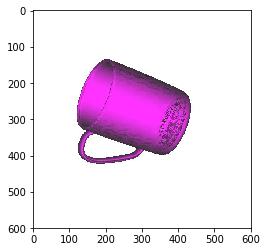

In [3]:
plt.imshow(image)
plt.show()

In [4]:
 edges = cv2.Canny(image,199,199)

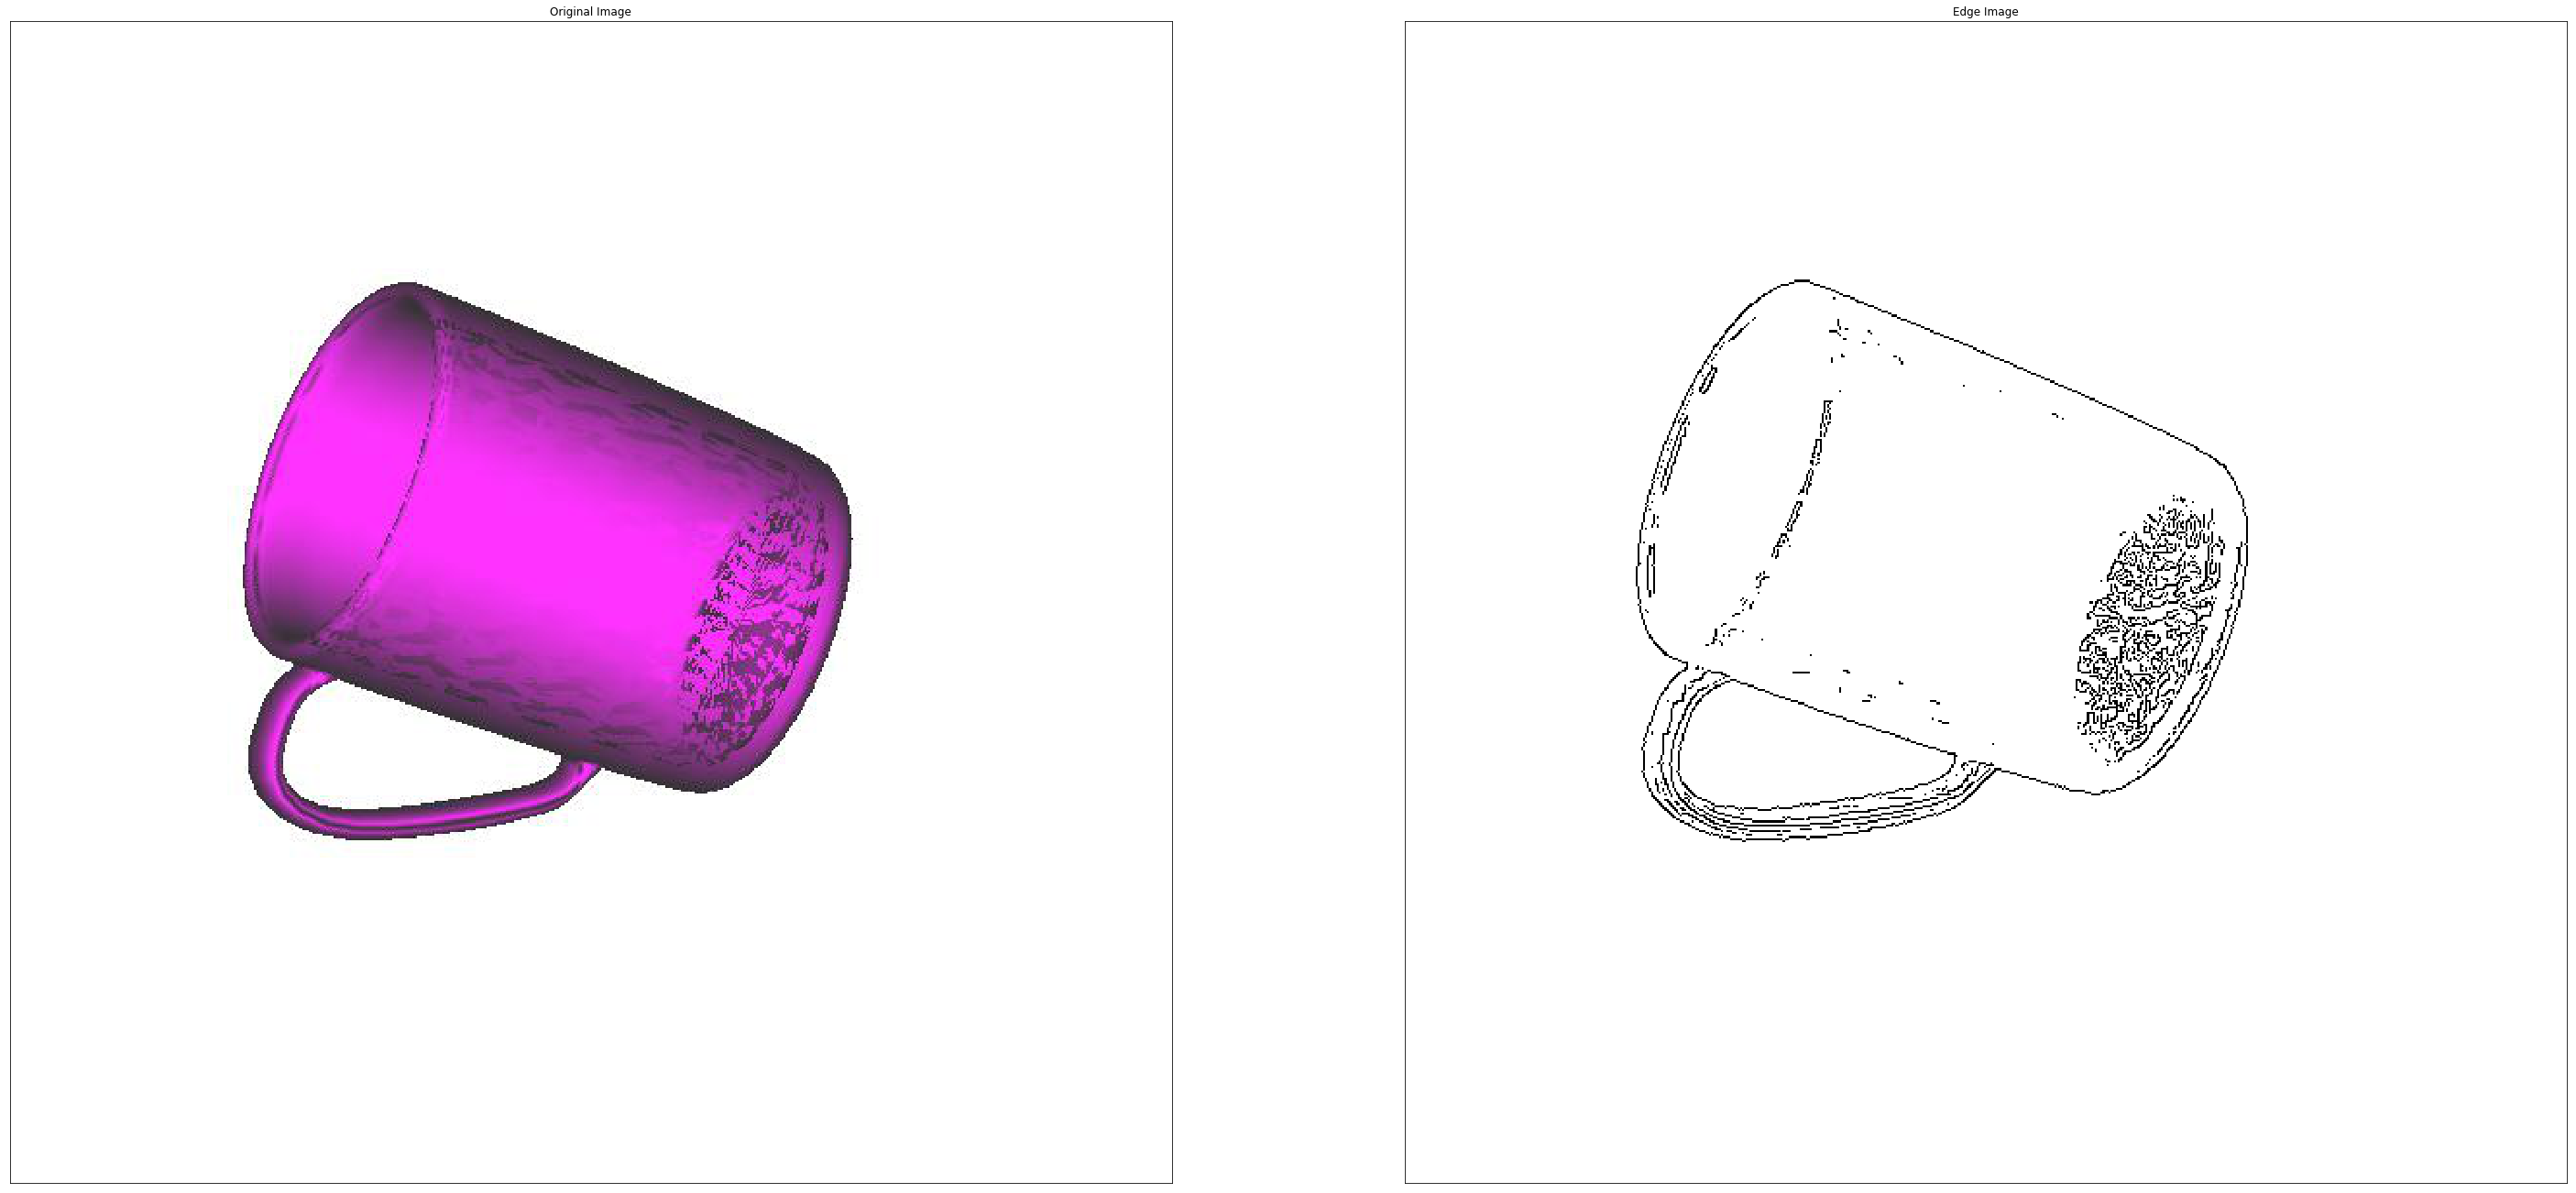

In [5]:
plt.figure(figsize=(50,50))
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(255-edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# gabor response 
def get_gabor_response(theta, img):
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    g = get_gabor_filter(theta)
    response_fft = np.multiply(img_fft,g)
    response = np.fft.ifft2(np.fft.ifftshift(response_fft))
    return response
    

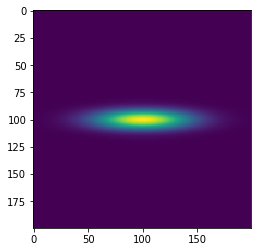

[[3.41910336e-18 1.63994724e-18 2.98127016e-18 ... 1.59123067e-18
  2.39005378e-18 1.72970788e-18]
 [3.30868931e-18 1.57338625e-18 2.93555187e-18 ... 1.56315696e-18
  2.33718606e-18 1.68977757e-18]
 [2.99119586e-18 1.38600001e-18 2.80508253e-18 ... 1.48676192e-18
  2.18863910e-18 1.59908386e-18]
 ...
 [2.50749637e-18 1.11102491e-18 2.60863665e-18 ... 1.38400990e-18
  1.96894447e-18 1.53362807e-18]
 [2.99112839e-18 1.38620076e-18 2.80482038e-18 ... 1.48639656e-18
  2.18898315e-18 1.59883219e-18]
 [3.30854293e-18 1.57331697e-18 2.93557973e-18 ... 1.56300720e-18
  2.33722236e-18 1.68972746e-18]]


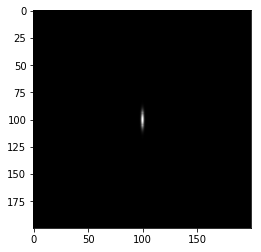

In [43]:
# gabor filter 
def get_gabor_value(u, v, sigma_x, sigma_y, w0, theta):
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + (y**2)*sigma_y**2))
    return res 

def get_gabor_filter(theta, side_length = 600, line_width = 0.02, lamb = 0.2, w = 0.13):
    sigma_x = line_width * w 
    sigma_y = sigma_x / lamb 
    u = np.arange(-side_length/2, side_length/2)
    v = np.arange(-side_length/2, side_length/2)
    g = np.zeros([side_length,side_length])
    for i in range (side_length):
        for j in range (side_length):
            x = u[j]
            y = v[i]
            g[i][j] = get_gabor_value(x,y,sigma_x,sigma_y,w,theta)
    return g
    
def get_gabor_bank(imgpath, k = 8):
    thetas = np.linspace(0,math.pi, k+1)
    index = 0
    for theta in thetas:
        g = get_gabor_filter(theta)
        index = index + 1 
        plt.savefig("%stheta=%02d.png" % (imgpath, index))


g = get_gabor_filter(0) 
plt.imshow(g, interpolation="nearest")
plt.show()
ifft = np.fft.ifftshift(np.fft.ifft2(g))
ma = np.amax(np.abs(ifft))
mi = np.amin(np.abs(ifft))
ifft = np.abs(ifft)
ifft = (ifft-mi)/ma
print(ifft)
plt.imshow(ifft,cmap='gray',clim=(0,1),interpolation="nearest")
plt.show()

    

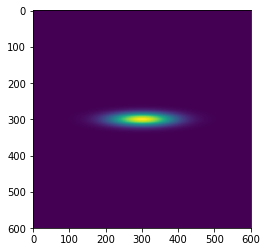

In [37]:
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(ifft))))

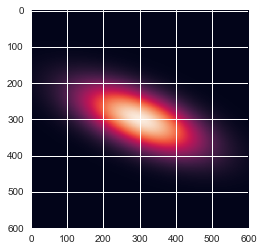

In [222]:
base_path = "/Users/yingyu/INF574"
filter_path = base_path+"/filters/"
debug_path  = base_path+"/filters/"

if not os.path.exists(filter_path):
    os.makedirs(filter_path)
    
if not os.path.exists(debug_path):
    os.makedirs(debug_path)
    
side_length = 600
line_width  = 0.02
lamb        = 0.2
w           = 0.13

sigma_x = line_width * w 
sigma_y = sigma_x / lamb 
#sigma_x = 12
#sigma_y = 60
num_thetas = 8

thetas = numpy.linspace(0, math.pi, num_thetas + 1)

for theta_index in range(num_thetas):

    theta = thetas[theta_index]
    
    R = numpy.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    
    u = numpy.arange(-300, 300)
    v = numpy.arange(-300, 300)
    
    (U, V) = numpy.meshgrid(u, v)
    #U = U *1./(5*side_length)
    #V = V *1./(5*side_length)
    U_theta = (U * R[0,0]) + (V * R[0,1])
    V_theta = (U * R[1,0]) + (V * R[1,1])
    
    g = numpy.exp(-2*(math.pi**2)*((U_theta - w)**2*(sigma_x**2) + (V_theta**2)*(sigma_y**2)))

    scipy.io.savemat("%stheta=%02d.mat" % (filter_path, theta_index), {"g":g}, oned_as="column")

    plt.imshow(g, interpolation="nearest");
    plt.savefig("%stheta=%02d.png" % (debug_path, theta_index));

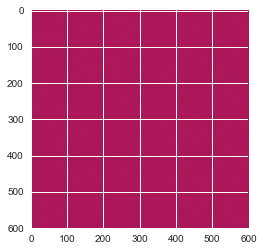

In [209]:
edge_fft = np.fft.fft2(edges)
real = np.real(edge_fft)
plt.imshow(real)
plt.show()

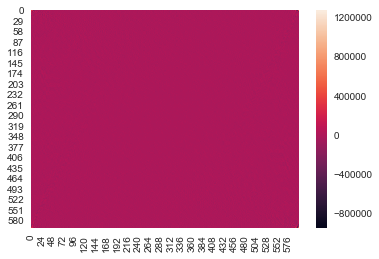

In [32]:
import seaborn as sns
sns.set()
sns.heatmap(real)

In [28]:
np.amin(real)

-942764.2996876077

In [29]:
np.amax(real)

1272705.0

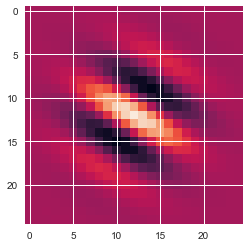

In [143]:
from skimage.filters import gabor_kernel
kernel = gabor_kernel(0.13,4*math.pi/6)
plt.imshow(np.real(kernel), interpolation='nearest')
plt.show()

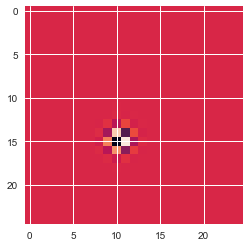

In [144]:
inv_kernel = np.real(np.fft.fftshift(np.fft.fft2(kernel)))
plt.imshow(inv_kernel)
plt.show()

In [203]:
def getGabor_value(u, v, sigma_x, sigma_y, w0, theta = 0):
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + (y**2)*sigma_y**2))
    return res

# get the gabor filter in frequency domain
def getGabor_filter(theta, w0 = 0.13, n_stds = 3, img_size = 600,sigma_xy = 0.02, linewidth = 0.3):
    sigma_x = linewidth * w0
    sigma_y = sigma_x/sigma_xy
    x0 = np.ceil(max(np.abs(n_stds * sigma_x * np.cos(theta)),1))
    #y0 = np.ceil(max(np.abs(n_stds * sigma_y * np.cos(theta)),
                     #np.abs(n_stds * sigma_x * np.sin(theta)), 1))
    #y, x = np.mgrid[-y0:y0 + 1, -x0:x0 + 1]
    g = np.zeros([int(2*x0+1),int(2*x0+1)])
    w00 = 2.*w0*np.cos(theta)/(2.*x0+1)
    y = np.arange(-x0,x0+1)*w00
    x = np.arange(-x0,x0+1)*w00
    print(y)
    print(x)
    for i in range(0,len(y)):
        for j in range(0,len(x)):
            u = x[j]
            v = y[i]
            g[i][j] = getGabor_value(u,v,sigma_x,sigma_y,w0,theta)
    return g


[-0.08666667  0.          0.08666667]
[-0.08666667  0.          0.08666667]


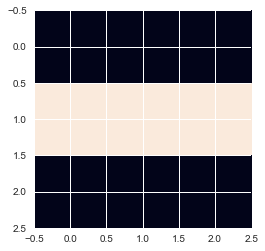

In [204]:
gabor_filter = getGabor_filter(0,0.13)
plt.imshow(gabor_filter)
plt.show()

In [189]:
def getGabor(u, v, w0 = 0.13, theta = 0, sigma_x = 5, sigma_y = 10):
    sigma_y = sigma_x/0.3
    theta = 0.*math.pi/4
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + (y**2)*sigma_y**2))
    return res

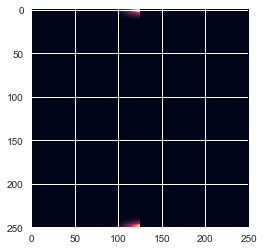

In [192]:
im = np.zeros(edges.shape)
h = im.shape[0]
w = im.shape[1]

im = np.zeros([250,250])
for i in range(-125,125):
    u = float(i*0.001)
    for j in range(-125,125):
        v = float(j*0.001)
        im[j][i] = getGabor(u,v, w0=0.13, sigma_x= 0.02*w)
plt.imshow(im)
plt.show()
#print(im[0])

In [167]:
def getGabor(u, v, w0 = 0.1, sigma_x = 0.5, sigma_y = 10):
    sigma_y = sigma_x/0.3
    theta = 0
    x = u* math.cos(theta)-v*math.sin(theta)
    y = u* math.sin(theta)+v*math.cos(theta)    
    res = math.exp(-2*(math.pi**2)*(((x-w0)**2)*sigma_x**2 + ((y)**2)*sigma_y**2))
    return res

In [14]:
im = np.zeros(edges.shape)
w = len(im)
for i in range(len(im)):
    u = 2*math.pi*i/len(im)
    #print(u)
    for j in range(len(im[0])):
        
        v = 2*math.pi*j/len(im)
        im[i][j] = getGabor(u, v, w0=0.13, sigma_x= 0.02*w)

In [15]:
np.sum(np.multiply(im, im))

4.125895574663202e-39

/Users/yingyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


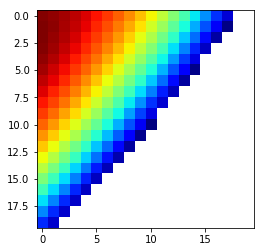

In [20]:
plt.imshow(np.log(im)[0:20,0:20], cmap='jet')
plt.show()

In [17]:
changed = np.abs(np.fft.ifft(np.multiply(np.fft.fft(edges), im)))

TypeError: Image data cannot be converted to float

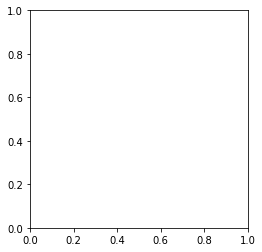

In [22]:
plt.imshow(10**47*changed)
plt.show()

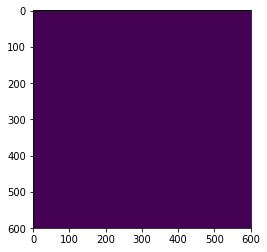

In [507]:
plt.imshow(np.abs(np.fft.ifft( im)))
plt.show()

In [508]:
f = np.fft.fft2(np.abs(image))